# Step-by-Step Approach to LAB 08 using Pandas

In [ ]:
# This notebook contains sample code on how to make use of pandas to deal with Lab 08
# Certain functions like groupby(), sample() vary significantly compared to data science functions
# I encourage students to use pandas dataframes for labs but it is 100% optional

In [ ]:
import pandas as pd
import numpy as np
path = "https://raw.githubusercontent.com/DS200-SP2024-Hunter/Lab08-DueMar20/main/FiveKResults.csv"

# Task 1:
Load the dataset (the URL is given above) into python. Give it a sensible name that you can remember, like fiveK.

In [ ]:
# Sample code
fiveK = pd.read_csv(path_data)

# Task 2:
Perform an A/B test of the null hypothesis that the hypothetical average male time in this race equals the hypothetical average female time in this race, among all 5K runners. For this purpose, you can either use the difference_of_means function from Section 12.1 or you can create your own version of this function using pandas.

In [ ]:
# Sample function to perform the task of finding difference between male and female average finsihing time repetitively:

def difference_of_means(dataframe, group_label):
  reduced = dataframe[['Interested Column Name', group_label]].groupby(group_label).mean()
  return reduced.loc[False][0] - reduced.loc[True][0]

# loc is basically a label based locate function very vital for accessing / slicing a group of rows
# loc[False] --> male
# loc[True] --> female

In [ ]:
# Sample code to shuffle the column "Identifies As Female" and stimulate one difference of mean value

def one_simulated_difference_of_means():
    shuffled_labels = fiveK['The name of the column you are interested in shuffling'].sample(n = 656, replace=False).reset_index(drop=True)
    reduced_df = fiveK.copy()[['Column A', 'Column B']] # specify the name of the columns you want. Narrow down your table, we are interested only in two columns
    reduced_df['shuffled_labels'] = shuffled_labels
    return difference_of_means(reduced_df, 'shuffled_labels')

In [ ]:
# Performing this task for n repetitions
differences = list()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences.append(new_difference)



# Task 3
Plot the histogram of mean differences that you obtain by simulation under the null hypothesis of no mean difference. Compare this histogram to the value observed in the sample, calculate a p-value, and comment on what this p-value tells you in this case about whether we should reject the null hypothesis. Write a conclusion sentence that conveys what you have discovered to an audience unfamiliar with statistical terminology.



array([[<Axes: title={'center': '0'}>]], dtype=object)

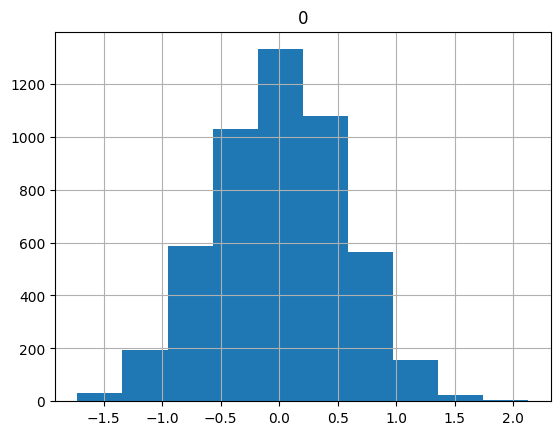

In [ ]:
pd.DataFrame(differences).hist()
# by default bins values will be set according to the distribution of the data
# if you don't want the grid, add a parameter of grid = False inside hist()

In [ ]:
# observe value corresponds to original mean difference before the hypothesis testing is performed
# for example, consider observed difference = -1
# Modify the observed difference as per your scenario
observed_difference = -1
diff_array = np.array(differences)
empirical_p = np.count_nonzero(diff_array<=observed_difference)/ repetitions
empirical_p

0.0386

Note:
If the observed value falls on the right side of the distribution (meaning it's higher than most of the other values in the distribution), you calculate the p-value by considering all values greater than or equal to the observed value

if the observed value falls on the left side of the distribution (meaning it's lower than most of the other values in the distribution), you calculate the p-value by considering all values less than or equal to the observed value

# Task 4
Using the steps outlined in Tasks 4 through 7, construct a confidence interval for the true mean difference (male mean minus female mean) using bootstrapping.

In [ ]:
fiveK['Identifies As Female'].value_counts()

False    363
True     293
Name: Identifies As Female, dtype: int64

In [ ]:
fiveK_male = fiveK[fiveK['Identifies As Female']==False]
fiveK_female = fiveK[fiveK['Identifies As Female']==True]

# Task 5
Rewrite the function one_bootstrap_median in Section 13.2.6. so that it selects one bootstrap sample for females, another for males, then returns the difference of the two mean finishing times. Here is code that accomplishes this if you're using the datascience package:

In [ ]:
# Now perform Bootstripping on fiveK_Male and fiveK_Female and find the mean difference
def one_bootstrap_mean_difference():
    resampled_Females = fiveK_female.sample(n = 293, replace = True)
    resampled_Males = # follow the syntax but remeber the n changes for male
    Female_mean = np.mean(resampled_Females['Finishing Time In Minutes'])
    Male_mean = # your code
    bootstrapped_mean_difference =  Male_mean - Female_mean
    return bootstrapped_mean_difference

# Task 6
Reproduce the analysis of Section 13.2.7 by creating a histogram of 5000 bootstrapped mean differences. You will have to choose histogram bins that are appropriate for this example AND there will not be a green dot showing the position of the population parameter (since in this case we do not know the population parameter).

In [ ]:
num_repetitions = 5000
bstrap_means = list() #creating an empty list
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean_difference())

array([[<Axes: title={'center': 'Bootstrap Sample means'}>]], dtype=object)

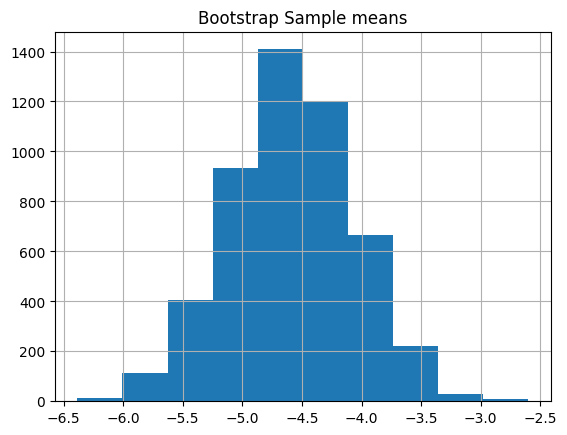

In [ ]:
resampled_means = pd.DataFrame({"Bootstrap Sample means": bstrap_means})
resampled_means.hist()

# Task 7
Find the 2.5 and 97.5 percentiles of your mean difference distribution, and use these values as a 95% confidence interval. You should include a text box in your output that says "We are 95% confident that the true difference in mean 5K road race finishing times between females and males is between ----- and -----." (You will fill in the blanks.)

In [ ]:
left = np.percentile(bstrap_means, 2.5)
right =  # your code
print(left, right)